### Visualize data

In [1]:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION


## Data Exploration

In [3]:
data.dtypes

id                    object
ela                  float64
financeAmount        float64
address1              object
address2              object
address3              object
state                 object
city                  object
postcode             float64
applicationStatus     object
netSalary            float64
loanTenure             int64
interestRate           int64
loanApplied            int64
jobTitle              object
loanReason            object
dtype: object

In [4]:
# Find nan and count them for each column 

nan_counts = data.isna().sum()
print(nan_counts)

id                     0
ela                   61
financeAmount         61
address1               2
address2             138
address3             584
state                  0
city                   0
postcode              24
applicationStatus      0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
jobTitle               0
loanReason             0
dtype: int64


In [5]:
data.describe()

,ela,financeAmount,postcode,netSalary,loanTenure,interestRate,loanApplied
count,939.000000,939.000000,976.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15959.531416,3532.694356,47655.150615,3457.413940,21.990000,17.997000,5581.600000
std,24027.757185,3351.043863,27143.513917,11434.249677,4.614021,0.094868,3255.973403
min,0.000000,0.000000,1000.000000,450.000000,6.000000,15.000000,1000.000000
25%,1000.000000,1000.000000,26092.500000,1990.442500,24.000000,18.000000,3000.000000
50%,11000.000000,2500.000000,43900.000000,2676.085000,24.000000,18.000000,5000.000000
75%,22000.000000,5000.000000,71800.000000,3700.000000,24.000000,18.000000,10000.000000
max,397000.000000,10000.000000,98000.000000,359313.000000,24.000000,18.000000,10000.000000


In [6]:
# For ela and financeAmount 

"""Replacing nan to 0 for column ela and financeAmount"""

cols = ['ela', 'financeAmount']
data[cols] = data[cols].fillna(0)
data.head()



,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION


In [7]:
## Recheck if ela and financeAmount has nan

data_ela_fa = data[['ela', 'financeAmount']]
data_ela_fa.isna().sum()

ela              0
financeAmount    0
dtype: int64

In [8]:
# Assuming data is your DataFrame and 'id' is the column containing IDs
data_with_id = data[data['id'] == '75fa994e-3b2f-4091-8e4c-eaec193c177e']
print(data_with_id)


                                       id  ela  financeAmount    address1  \
719  75fa994e-3b2f-4091-8e4c-eaec193c177e  0.0            0.0  30/11/2002   

                         address2            address3         state  \
719  APARTMEMT DESA TASIK FASA 1A  DESA TASIK SG BESI  KUALA LUMPUR   

             city  postcode applicationStatus  netSalary  loanTenure  \
719  KUALA LUMPUR   57000.0          REJECTED     4700.0          24   

     interestRate  loanApplied   jobTitle  loanReason  
719            18        10000  EXECUTIVE  RENOVATION  


In [9]:
# Assuming data is your DataFrame and 'id' is the column containing IDs
data_with_id = data[data['id'] == '24624046-b496-4992-8673-04fa8d9894cf']
print(data_with_id)



                                       id     ela  financeAmount  \
233  24624046-b496-4992-8673-04fa8d9894cf  2000.0         1000.0   

         address1     address2 address3     state       city  postcode  \
233  NO 3C BLOK 6  JALAN DAWAI   16-Feb  SELANGOR  SHAH ALAM   40200.0   

    applicationStatus  netSalary  loanTenure  interestRate  loanApplied  \
233          APPROVED     1766.0          24            18         3000   

    jobTitle           loanReason  
233   DRIVER  DEBTS CONSOLIDATION  


row 719 and row 233 has wrong data -- first checked using excel.

In [10]:
## Replacing nan and date for address1, address2, address3 to empty string ''

cols = ['address1', 'address2', 'address3']

data[cols] = data[cols].fillna('')

In [11]:
data_add = data[['address1', 'address2', 'address3']]
data_add.isna().sum()

address1    0
address2    0
address3    0
dtype: int64

In [12]:
data.head()

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",,,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION


In [13]:
# Combine address1, address2, address3 into one column
data['address'] = data.apply(lambda row: ', '.join([str(row['address1']), str(row['address2']), str(row['address3'])]), axis=1)
data.drop(['address1', 'address2', 'address3'], axis=1, inplace=True)
last_col = data.pop(data.columns[-1])
data.insert(3, 'address', last_col)
data

,id,ela,financeAmount,address,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,"PT 2344 JLN SRI PERASING, 4/2 TMN SRI PERASING...",TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,"UNIT A-11-9 DOMAIN 2, LINGKARAN CYBER POINT BA...",SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT, ,",KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16, TAMAN CEMPAKA...",KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,"PT 2326, TAMAN ROS SETIA, JUASSEH",NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,a1cd274b-39f2-43fd-aa6f-3d246d33757e,7000.0,7000.0,"NO 6747 MK 13, JALAN PADANG MENORA, TASEK GELUGOR",PENANG,TASEK GELUGOR,13310.0,REJECTED,2500.0,24,18,10000,OWN WORKER,DEBTS CONSOLIDATION
996,a1d4d2a9-a5cb-4a3f-ba44-4faf59deb2c2,43000.0,5000.0,"LOT 105, KAMPUNG KEMUNING, MACHANG KELANTAN",KELANTAN,MACHANG,18500.0,REJECTED,3500.0,24,18,5000,PENGURUS,EXPAND BUSINESS
997,a1ecfb05-8bc1-45b1-a10f-74213ca9e5a4,0.0,0.0,"709,, JALAN BUKIT PUTERI 11/23A, BANDAR PUTERI...",KEDAH,SUNGAI PETANI,8000.0,REJECTED,951.0,12,18,2000,PEMBANTU OPERASI,EXPAND BUSINESS
998,a2085b5f-51d6-4cc4-a90f-a29b69c52225,11000.0,2000.0,"NO14, LORONG LAUTAN SAMUDERA 9/2B, BANDAR PUNC...",SELANGOR,BANDAR PUNCAK ALAM,42300.0,REJECTED,2700.0,12,18,2000,DEPARTMENT MANAGER (OPERATION),EDUCATION


In [14]:
# Dropping id column as it is irrelevant for the analysis 

data.drop(columns=['id', 'address', 'state', 'city', 'postcode', 'jobTitle'], inplace=True)
data.head()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,5000.0,5000.0,REJECTED,1900.0,18,18,5000,DEBTS CONSOLIDATION
1,0.0,0.0,REJECTED,7260.0,24,18,10000,RENOVATION
2,49000.0,6000.0,REJECTED,4000.0,24,18,6000,DEBTS CONSOLIDATION
3,6000.0,1000.0,APPROVED,1200.0,12,18,1500,DEBTS CONSOLIDATION
4,0.0,0.0,REJECTED,3948.0,24,18,5000,DEBTS CONSOLIDATION


## Data Visualization
- Exploring the data distribution

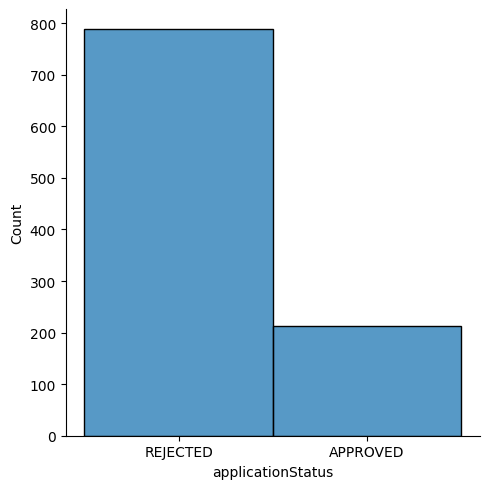

In [15]:
import seaborn as sns

# tips = sns.load_dataset("tips")
sns.displot(data, x="applicationStatus")

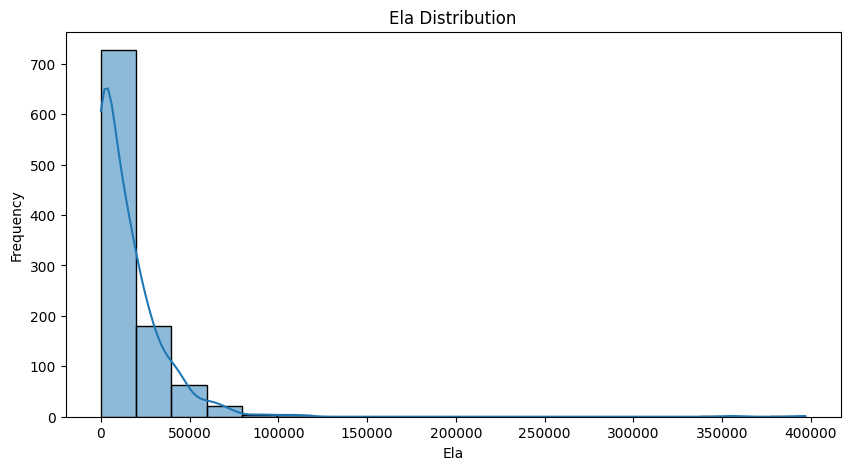

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data, x='ela', bins=20, kde=True)
plt.xlabel('Ela')
plt.ylabel('Frequency')
plt.title('Ela Distribution')
plt.show()

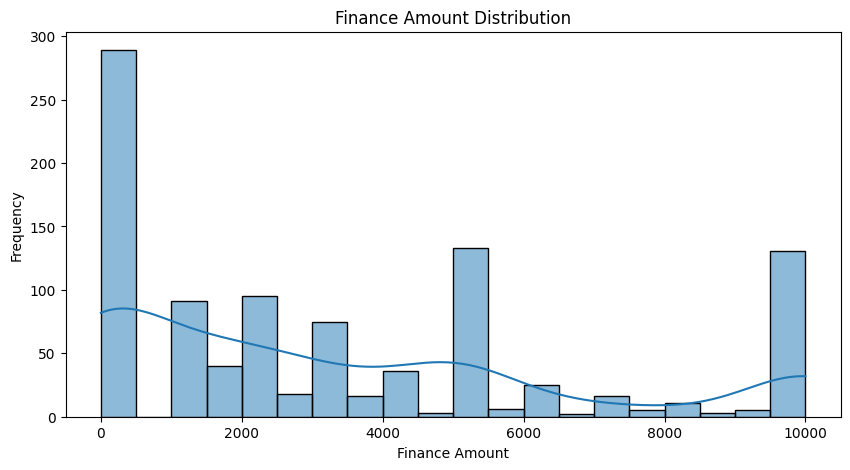

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data, x='financeAmount', bins=20, kde=True)
plt.xlabel('Finance Amount')
plt.ylabel('Frequency')
plt.title('Finance Amount Distribution')
plt.show()

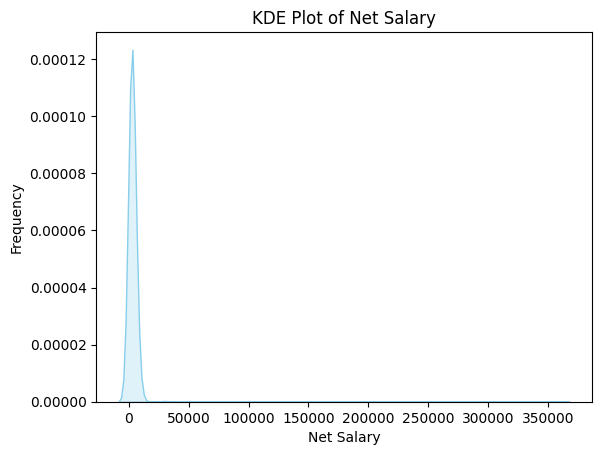

In [18]:
sns.kdeplot(data=data, x='netSalary', color='skyblue', fill=True)
# sns.set(style='whitegrid')
plt.title('KDE Plot of Net Salary')
plt.xlabel('Net Salary')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='loanTenure', ylabel='count'>

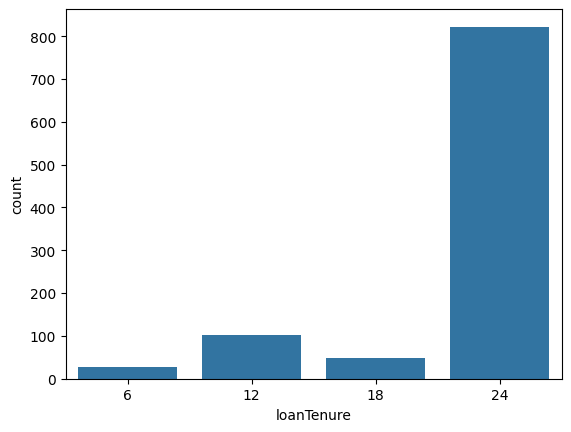

In [19]:
import seaborn as sns

# tips = sns.load_dataset("tips")
sns.countplot(data, x="loanTenure")

<Axes: xlabel='interestRate', ylabel='count'>

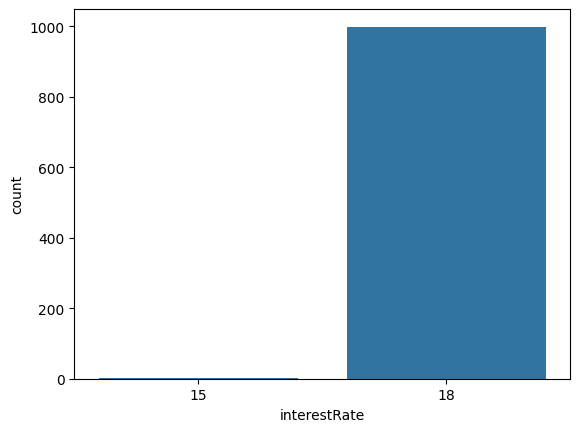

In [20]:
import seaborn as sns

sns.countplot(data, x="interestRate")

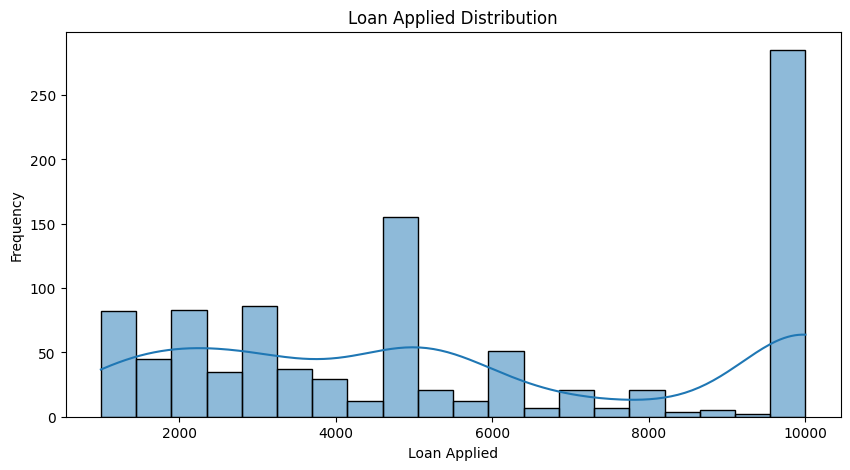

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data, x='loanApplied', bins=20, kde=True)
plt.xlabel('Loan Applied')
plt.ylabel('Frequency')
plt.title('Loan Applied Distribution')
plt.show()

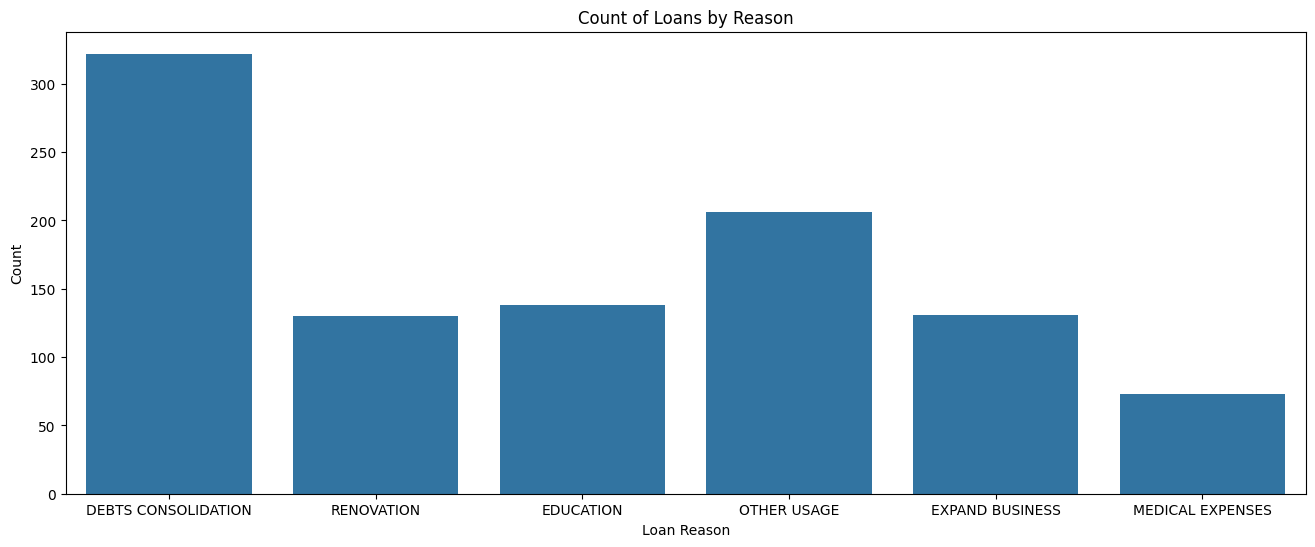

In [22]:
import seaborn as sns

plt.figure(figsize=(16, 6)) 
sns.countplot(data, x="loanReason")
# plt.xticks(rotation=30, fontsize=8)

plt.title('Count of Loans by Reason')
plt.xlabel('Loan Reason')
plt.ylabel('Count')
plt.show()

## Plotting Loan Applied vs Net Salary

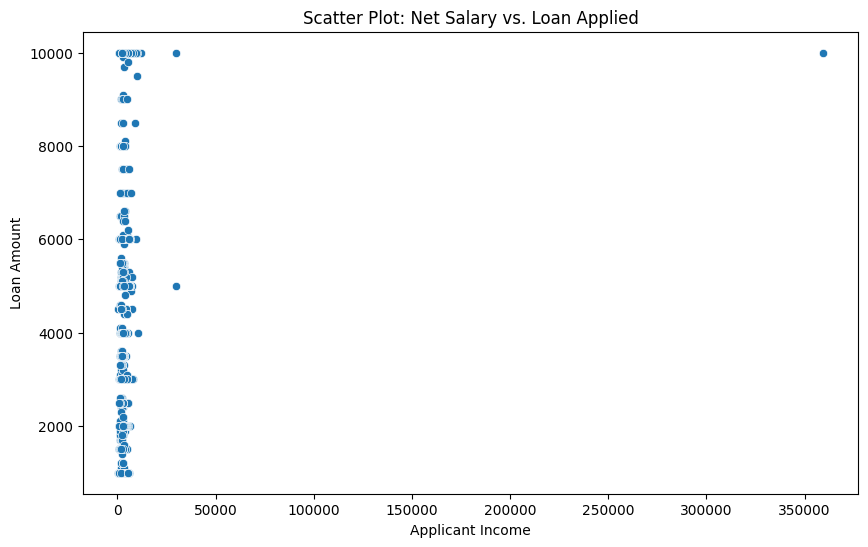

In [23]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='netSalary', y='loanApplied')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Net Salary vs. Loan Applied')
plt.show()

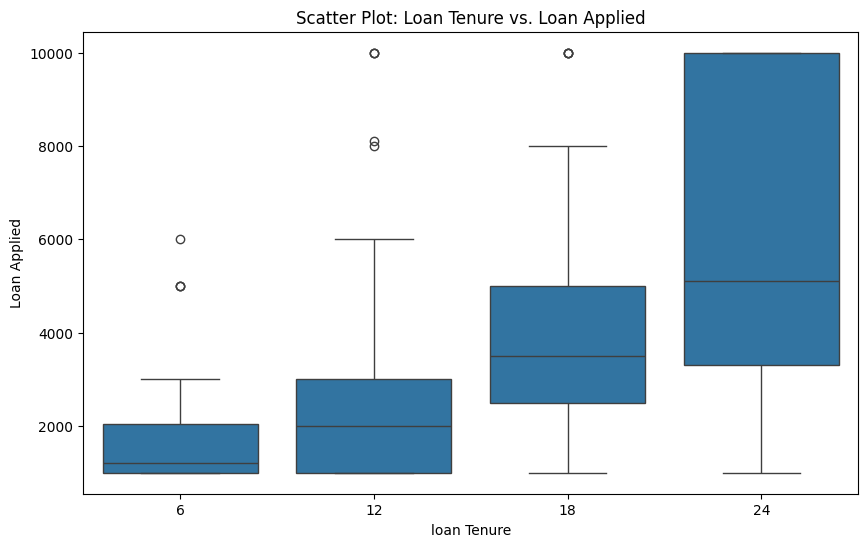

In [24]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='loanTenure', y='loanApplied')
plt.xlabel('loan Tenure')
plt.ylabel('Loan Applied')
plt.title('Scatter Plot: Loan Tenure vs. Loan Applied')
plt.show()

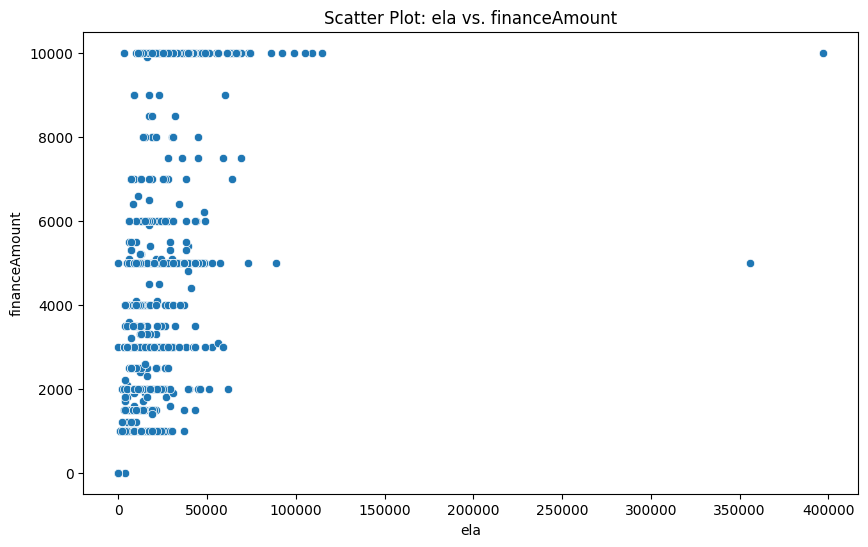

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ela', y='financeAmount')
plt.xlabel('ela')
plt.ylabel('financeAmount')
plt.title('Scatter Plot: ela vs. financeAmount')
plt.show()

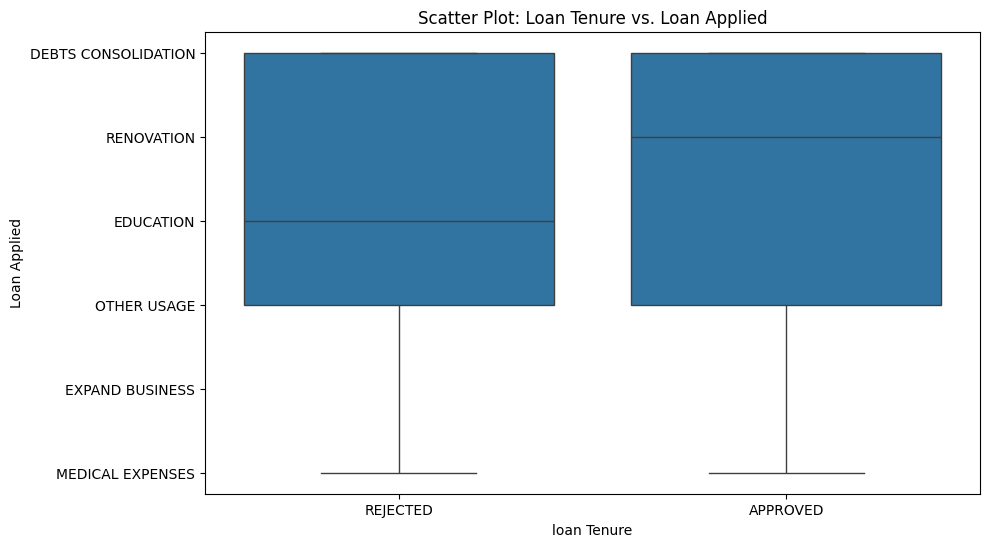

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='applicationStatus', y='loanReason')
plt.xlabel('loan Tenure')
plt.ylabel('Loan Applied')
plt.title('Scatter Plot: Loan Tenure vs. Loan Applied')
plt.show()

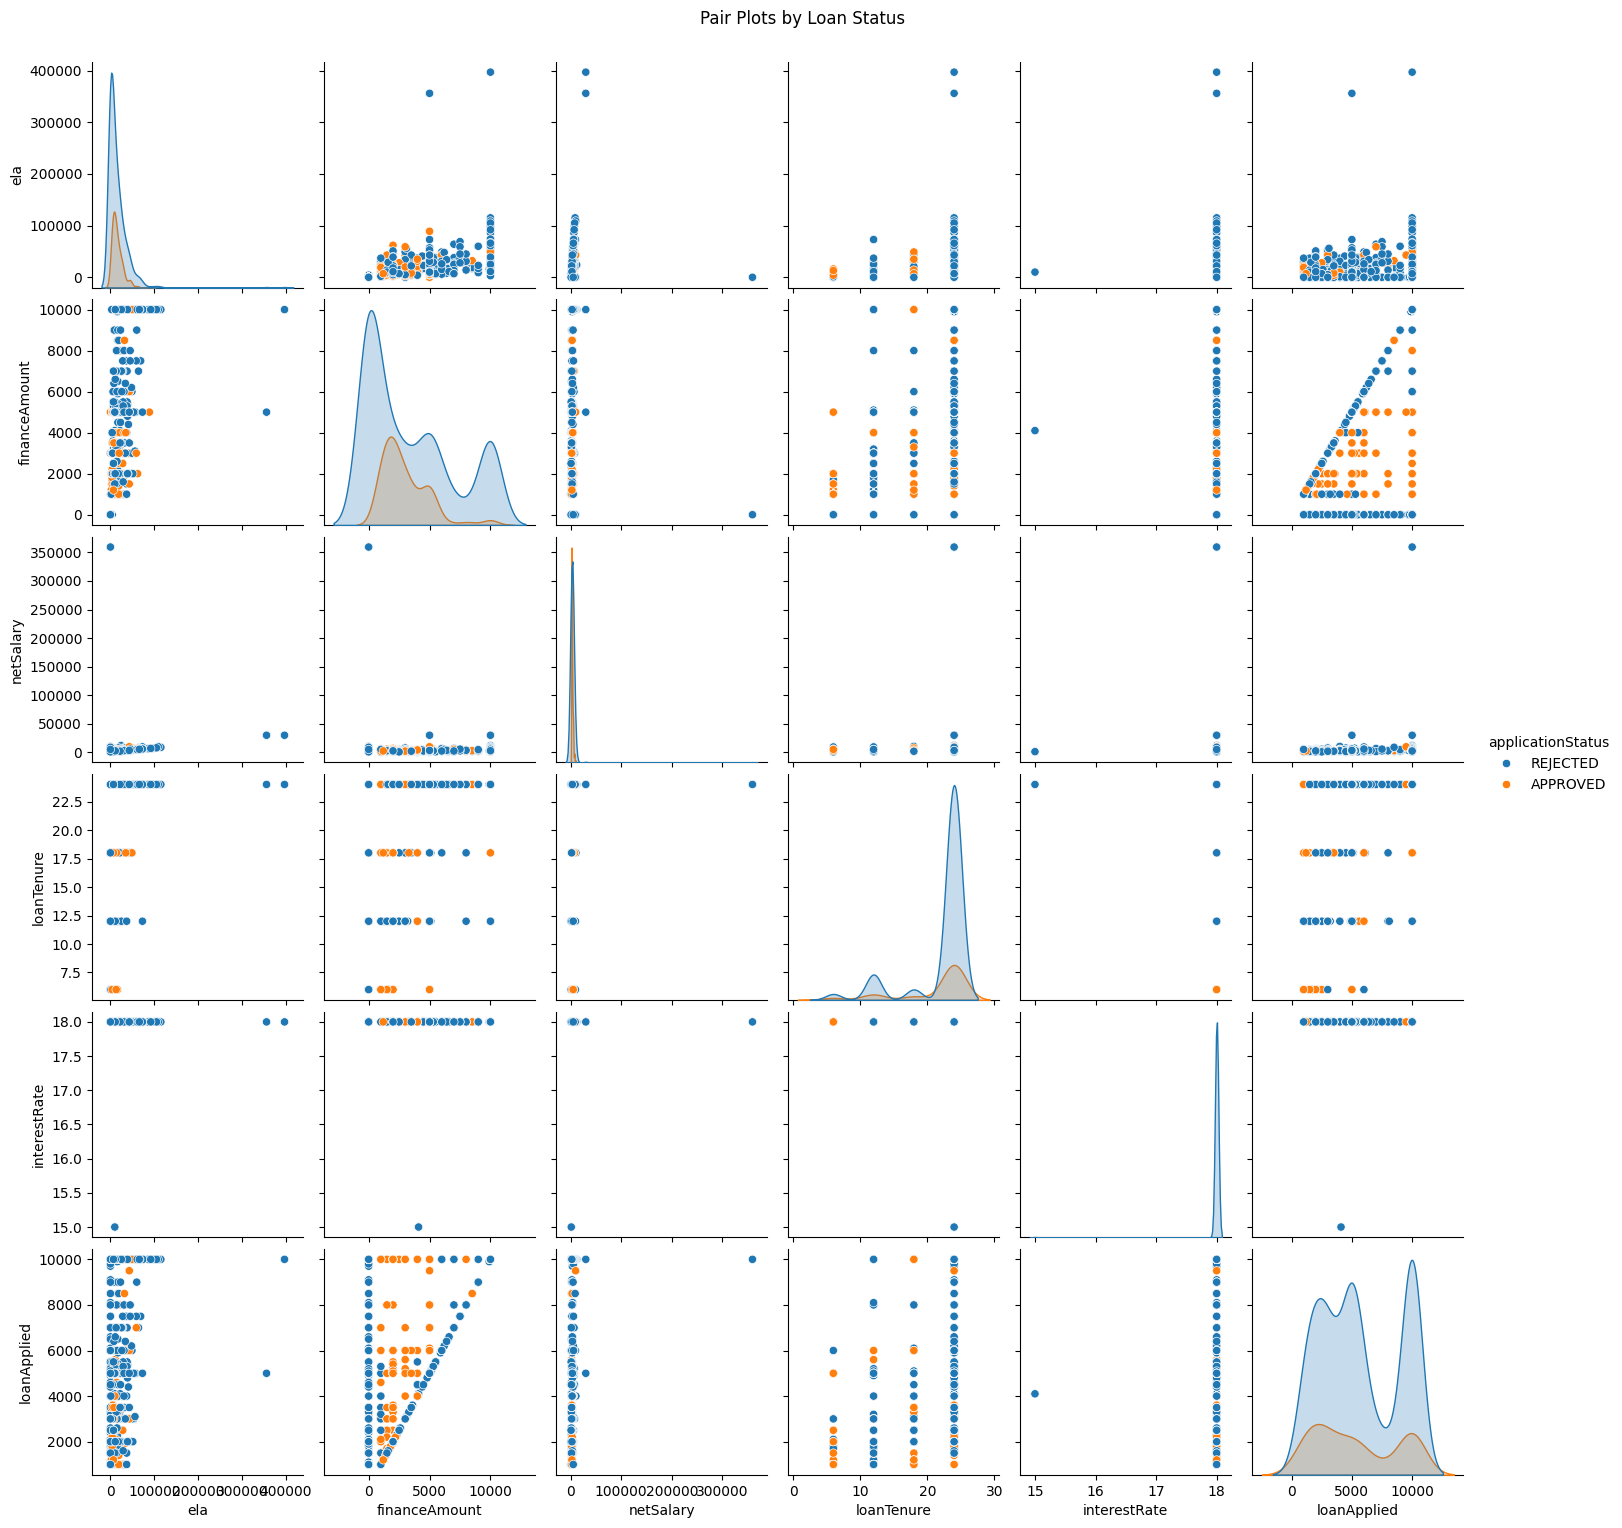

In [27]:


sns.pairplot(data, hue='applicationStatus')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

### Data Preparation

In [28]:
# Encode the loanReason column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['loanReason'] = label_encoder.fit_transform(data['loanReason'])
ori_label = label_encoder.classes_

for key, val in enumerate(ori_label):
    print(f"Label ({key}): {val}")

Label (0): DEBTS CONSOLIDATION
Label (1): EDUCATION
Label (2): EXPAND BUSINESS
Label (3): MEDICAL EXPENSES
Label (4): OTHER USAGE
Label (5): RENOVATION


In [29]:
# Encode the loanReason column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['applicationStatus'] = label_encoder.fit_transform(data['applicationStatus'])
ori_label = label_encoder.classes_

for key, val in enumerate(ori_label):
    print(f"Label ({key}): {val}")

Label (0): APPROVED
Label (1): REJECTED


In [30]:
data.head()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,5000.0,5000.0,1,1900.0,18,18,5000,0
1,0.0,0.0,1,7260.0,24,18,10000,5
2,49000.0,6000.0,1,4000.0,24,18,6000,0
3,6000.0,1000.0,0,1200.0,12,18,1500,0
4,0.0,0.0,1,3948.0,24,18,5000,0


In [31]:
# Normalize the data using StandardScaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = ['ela', 'financeAmount', 'netSalary', 'loanTenure', 'interestRate', 'loanApplied', 'loanReason']
data_ss = data.copy()
data_ss.head()


,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,5000.0,5000.0,1,1900.0,18,18,5000,0
1,0.0,0.0,1,7260.0,24,18,10000,5
2,49000.0,6000.0,1,4000.0,24,18,6000,0
3,6000.0,1000.0,0,1200.0,12,18,1500,0
4,0.0,0.0,1,3948.0,24,18,5000,0


In [32]:
data_ss[cols] = scaler.fit_transform(data_ss[cols])
data_ss[cols] = scaler.transform(data_ss[cols])

In [33]:
data_ss.head()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,-0.635493,-0.988932,1,-0.302537,-4.955900,-189.466294,-1.715177,0
1,-0.635502,-0.989376,1,-0.302496,-4.673784,-189.466294,-1.714705,5
2,-0.635414,-0.988843,1,-0.302521,-4.673784,-189.466294,-1.715083,0
3,-0.635491,-0.989287,0,-0.302542,-5.238015,-189.466294,-1.715508,0
4,-0.635502,-0.989376,1,-0.302521,-4.673784,-189.466294,-1.715177,0


## Splitting the data 


In [34]:
X = data_ss.drop('applicationStatus', axis=1)
y = data_ss['applicationStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Setup the model and train

Logistic Regression:


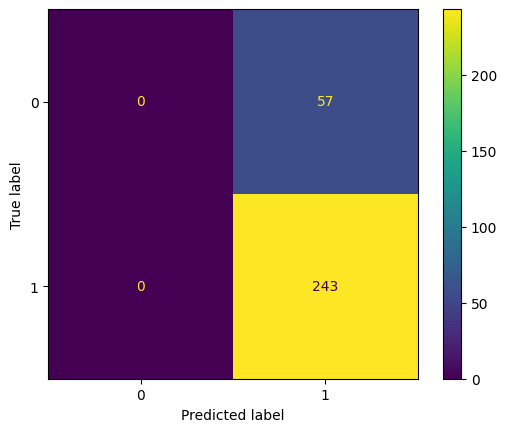

In [35]:
## Logistic Regression 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_cf = confusion_matrix(y_test, lr_y_pred)
print("Logistic Regression:")
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cf, display_labels=lr_model.classes_)
disp.plot()
plt.show()


Random Forest:


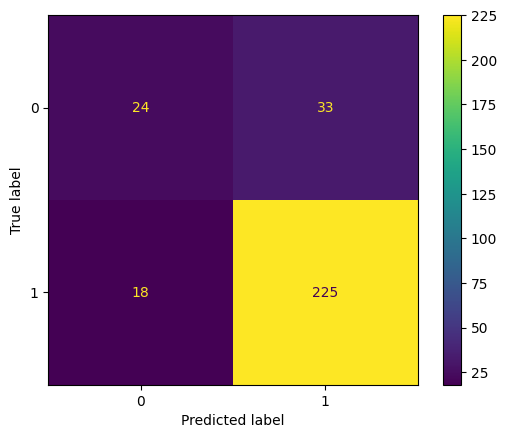

In [36]:
## Random Forest Classifier 

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_cf = confusion_matrix(y_test, rf_y_pred)
print("Random Forest:")
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cf, display_labels=rf_model.classes_)
disp.plot()
plt.show()

Decision Tree Classifier:


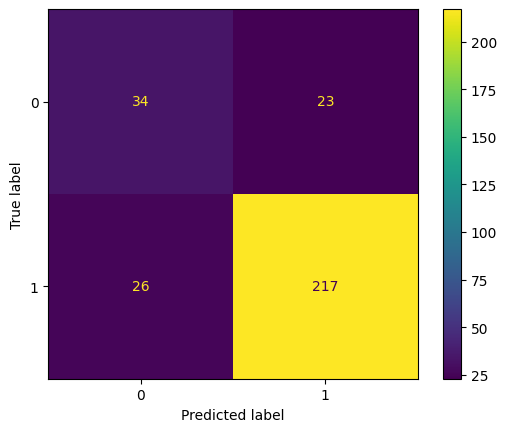

In [37]:
## Decision Tree Classifier 

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_cf = confusion_matrix(y_test, dt_y_pred)
print("Decision Tree Classifier:")
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cf, display_labels=dt_model.classes_)
disp.plot()
plt.show()

Support Vector Classifier:


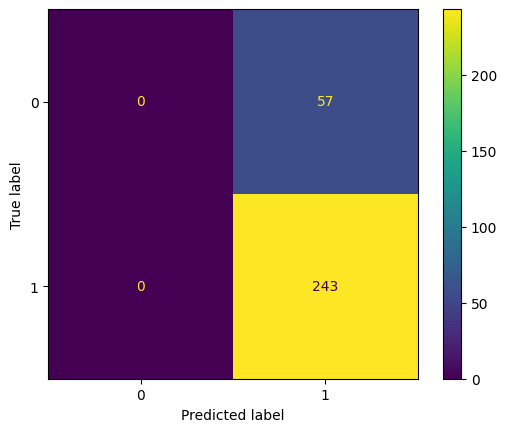

In [38]:
# SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
svc_cf = confusion_matrix(y_test, svc_y_pred)
print("Support Vector Classifier:")
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cf, display_labels=svc_model.classes_)
disp.plot()
plt.show()

XG Boost:


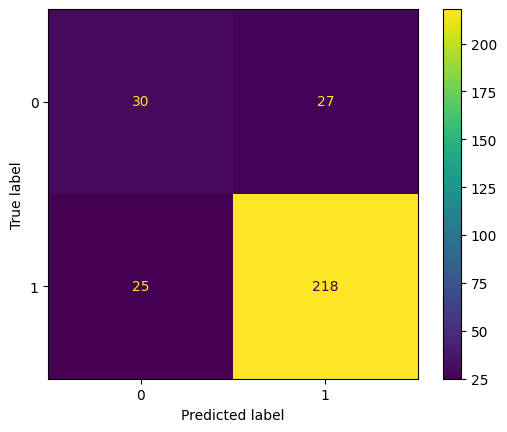

In [39]:
# XGBoost

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_cf = confusion_matrix(y_test, xgb_y_pred)
print("XG Boost:")
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cf, display_labels=xgb_model.classes_)
disp.plot()
plt.show()

LightGBM Classifier:


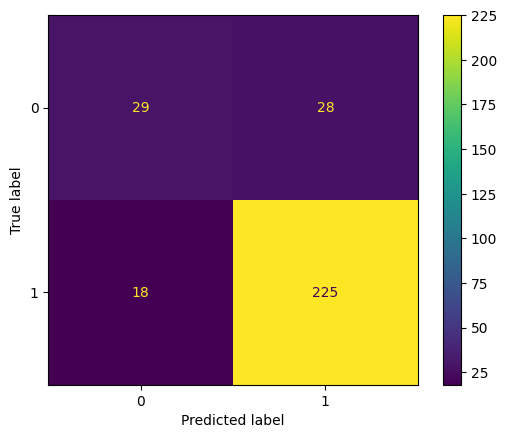

In [40]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(verbosity=-1)
# callbacks = [lgb.early_stopping(100, verbose=0), lgb.log_evaluation(period=0)]
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)
lgb_cf = confusion_matrix(y_test, lgb_y_pred)
print("LightGBM Classifier:")
disp = ConfusionMatrixDisplay(confusion_matrix=lgb_cf, display_labels=lgb_model.classes_)
disp.plot()
plt.show()

In [41]:
from sklearn.metrics import classification_report
import pandas as pd

models_ls = [('Logistic Regression', lr_model), ('Random Forest', rf_model), ('Decision Tree', dt_model), ('SVC', svc_model), ('XGBoost', xgb_model),
             ('LightBGM', lgb_model)]

all_models_reports = []


for model_name, model_instance in models_ls:

    y_pred = model_instance.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    df_classification_report = pd.DataFrame(report).transpose()
    
    df_classification_report['Model'] = model_name
    
    all_models_reports.append(df_classification_report)

combined_df = pd.concat(all_models_reports)

combined_df


,precision,recall,f1-score,support,Model
0,0.000000,0.000000,0.000000,57.000000,Logistic Regression
1,0.810000,1.000000,0.895028,243.000000,Logistic Regression
accuracy,0.810000,0.810000,0.810000,0.810000,Logistic Regression
macro avg,0.405000,0.500000,0.447514,300.000000,Logistic Regression
weighted avg,0.656100,0.810000,0.724972,300.000000,Logistic Regression
0,0.571429,0.421053,0.484848,57.000000,Random Forest
1,0.872093,0.925926,0.898204,243.000000,Random Forest
accuracy,0.830000,0.830000,0.830000,0.830000,Random Forest
macro avg,0.721761,0.673489,0.691526,300.000000,Random Forest
weighted avg,0.814967,0.830000,0.819666,300.000000,Random Forest


### Result: 

##### Based on the above result, Random Forest Classifier and LightBGM are the two best models.

## Predict with any data from data.csv

In [69]:
random_data = {
              'ela': 23000,
              'financeAmount': 3000,
              'applicationStatus': 'APPROVED',
              'netSalary': 5088,
              'loanTenure': 24,
              'interestRate': 18,
              'loanApplied': 10000,
              'loanReason': 2} # 2 represent EXPAND BUSINESS

random_df = pd.DataFrame(random_data , index=[0])
random_df.drop(columns=['applicationStatus'], inplace=True)
random_df.head()

,ela,financeAmount,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,23000,3000,5088,24,18,10000,2


In [70]:
# Predict using RF 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(random_df)
predicted_outcome = rf_y_pred[0]
print("Predicted Outcome:", predicted_outcome)


Predicted Outcome: 1


In [71]:
# Predict using LightBGM
lgb_model = lgb.LGBMClassifier(verbosity=-1)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(random_df)
predicted_outcome = lgb_y_pred[0]
print("Predicted Outcome:", predicted_outcome)


Predicted Outcome: 1


## Predict with dummy data 

In [56]:
dummy_data = {
              'ela': 5500,
              'financeAmount': 5000,
              'applicationStatus': 'REJECTED', # Value is unknown (want to predict)
              'netSalary': 9000,
              'loanTenure': 18,
              'interestRate': 18,
              'loanApplied': 10000,
              'loanReason': 2}


In [58]:

# Convert to df
df_dummy = pd.DataFrame(dummy_data , index=[0])
df_dummy.head()


,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,5500,5000,REJECTED,9000,18,18,10000,2


In [62]:
df_dummy.drop(columns=['applicationStatus'], inplace=True)

In [63]:
# Predict using RF 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(df_dummy)

In [64]:
predicted_outcome = rf_y_pred[0]
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: 1


Model predict 'REJECTED'

In [65]:
# Predict using LightBGM
lgb_model = lgb.LGBMClassifier(verbosity=-1)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(df_dummy)
predicted_outcome = lgb_y_pred[0]
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: 1


Model predicted 'REJECTED'